## Metrics for classifiers

`scikit-learn` defines several metrics that are appropriate to use with classifiers. Many are defined in `sklearn.metrics`.

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd

In [38]:
# Read in a data set using Pandas. 
wdbc_data = '../data-sets/wdbc.csv'
df = pd.read_csv(wdbc_data, header=0)
df.head()

,id,radiusAvg,textureAvg,perimeterAvg,areaAvg,smoothnessAvg,compactnessAvg,concavityAvg,concavepointsAvg,symmetryAvg,...,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavepointsWorst,symmetryWorst,fractaldimWorst,c
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Create some classifiers

In [28]:
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split
test_percent = 0.30
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ttest_rel, ttest_ind
data = df.iloc[:].values

# extract X and y values from the data set; 
X = data[:, 1:-1]
y = data[:, -1]

# create the classifier objects; 
dtree = tree.DecisionTreeClassifier()
logr = linear_model.LogisticRegression(solver='liblinear')

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_percent, shuffle=True)
  
dtree.fit(X_train, y_train) 
logr.fit(X_train,  y_train) 

predictedTree = np.array(dtree.predict_proba(X_test))[:,1]
predictedLogR = np.array(logr.predict_proba(X_test))[:,1]

## Generate a confusion matrix

By default, `scikit-learn` will sort classes in ascending order. This behavior can be overridden by specifying an order using `labels`. 

In this dataset, `B` is 1 and `M` is 0. 

In [29]:
cm = metrics.confusion_matrix(y_test, predictedTree,labels=[1,0])

print("","B","M",sep="\t")
print("B",cm[0,0],cm[0,1],sep="\t" )
print("M",cm[1,0],cm[1,1],sep="\t" )

	B	M
B	100	6
M	12	53


## TP-Rate, FP-Rate, Success-Rate

Below, we manually create a confusion matrix. We also compute the true-positive rate, false positive rate, and accuracy. For the latter, we compare it to the result we obtain using the builtin `metrics.accuracy_score`. We also manually compute the error. 

In [30]:
pos = np.sum(y_test == 1)
neg = np.sum(y_test == 0)

TP = np.sum((predictedTree >= 0.5) & (y_test == 1))
FN = np.sum((predictedTree < 0.5) & (y_test == 1))
TN = np.sum((predictedTree < 0.5) &  (y_test == 0))
FP = np.sum((predictedTree >= 0.5) & (y_test == 0))


print("","B","M",sep="\t")
print("B",TP,FN,sep="\t" )
print("M",FP,TN,sep="\t" )
print('-'*20)
print("TP Rate:\t",TP/pos)
print("FP Rate:\t",FP/neg)
print("Success Rate:\t {}\t{}".format((TP+TN)/(pos+neg), metrics.accuracy_score(y_test,predictedTree)))
print("Error Rate:\t",1-(TP+TN)/(pos+neg))


	B	M
B	100	6
M	12	53
--------------------
TP Rate:	 0.9433962264150944
FP Rate:	 0.18461538461538463
Success Rate:	 0.8947368421052632	0.8947368421052632
Error Rate:	 0.10526315789473684


## Precision, Recall, F1

We'll manually compute precision and recall. 

In [31]:
# for B
Precision = TP/(TP + FP)
Recall = TP/pos
F1 = 2 * Precision*Recall/(Precision+Recall)
Support = pos # support is just the count of the class. 
forB = (Precision,Recall,F1,Support)

# for M
Precision = TN/(TN + FN)
Recall = TN/neg
F1 = 2 * Precision*Recall/(Precision+Recall)
Support = neg # support is just the count of the class. 
forM = (Precision,Recall,F1,Support)
print("\tprec\trec\tf1\tsup")
print("M\t{:.2f}\t{:.2f}\t{:.2f}\t{}".format(forM[0],forM[1],forM[2],forM[3]))
print("B\t{:.2f}\t{:.2f}\t{:.2f}\t{}".format(forB[0],forB[1],forB[2],forB[3]))

tot = forM[3] + forB[3]
weightB = forB[3]/tot
weightM = forM[3]/tot

print("Avg\t{:.2f}\t{:.2f}\t{:.2f}\t{}".format(weightB*forB[0]+weightM*forM[0],weightB*forB[1]+weightM*forM[1],weightB*forB[2]+weightM*forM[2],forB[3]+forM[3]))


	prec	rec	f1	sup
M	0.90	0.82	0.85	65
B	0.89	0.94	0.92	106
Avg	0.89	0.89	0.89	171


These metrics can also be obtained using builtin routines in scikit-learn. 

In [32]:
## Some common metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedTree, target_names=['M','B']))


forM = (
        metrics.precision_score(y_test, predictedTree, pos_label=0),
        metrics.recall_score(y_test, predictedTree, pos_label=0),
        metrics.f1_score(y_test, predictedTree, pos_label=0))

forB = (
        metrics.precision_score(y_test, predictedTree, pos_label=1),
        metrics.recall_score(y_test, predictedTree, pos_label=1),
        metrics.f1_score(y_test, predictedTree, pos_label=1))
print(20*'-')
print("\t\tprec\trec\tf1\tsup")
print("\tM\t{:.2f}\t{:.2f}\t{:.2f}".format(forM[0],forM[1],forM[2]))
print("\tB\t{:.2f}\t{:.2f}\t{:.2f}".format(forB[0],forB[1],forB[2]))

              precision    recall  f1-score   support

           M       0.90      0.82      0.85        65
           B       0.89      0.94      0.92       106

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.89      0.89      0.89       171

--------------------
		prec	rec	f1	sup
	M	0.90	0.82	0.85
	B	0.89	0.94	0.92


## Kappa statistics

Cohen's Kappa statistic measures how better a classifier is than a random predictor. In this case, a random predictor would yield an accuracy of 50%. 



In [33]:
(0.9415204678362573 - 0.5)/(0.5)


from sklearn.metrics import cohen_kappa_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print(metrics.accuracy_score(y_true,y_pred))
print(cohen_kappa_score(y_true, y_pred))

0.6666666666666666
0.4285714285714286


In [34]:
print((88+40+12)/200)
x = ((88+14+18)/200*((88+10+2)/200)) + ((10+40+10)/200*((14+40+6)/200)) +((2+6+12)/200*((18+10+12)/200))
print(x)
(0.7-x)/(1-x)

0.7
0.41000000000000003


0.49152542372881347

In [35]:
print('Kappa')
print(metrics.cohen_kappa_score(y_test, predictedTree))

Kappa
0.7725727796660263


## ROC Curve

It's also possible to generate data for ROC curves (which must then be plotted). 

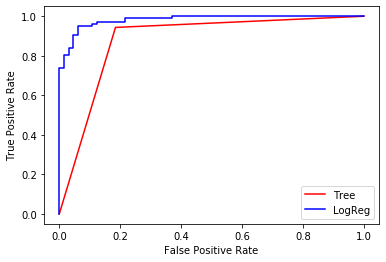

In [36]:
from sklearn.metrics import roc_curve
fpTree, tpTree, threshTree = roc_curve(y_test, predictedTree)
fpLog, tpLog, threshLog = roc_curve(y_test, predictedLogR)

plt.plot(fpTree, tpTree,'r',label = 'Tree')
plt.plot(fpLog,tpLog,'b', label= 'LogReg')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Precision Recall Curve



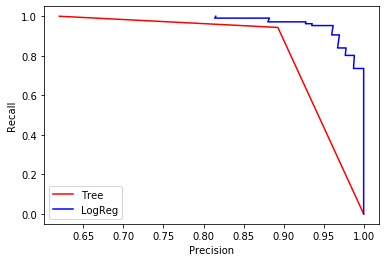

[0.61988304 0.89285714 1.        ]


In [37]:
from sklearn.metrics import precision_recall_curve
precTree, recTree, threshTree = precision_recall_curve(y_test, predictedTree)
precLog, recLog, threshLog = precision_recall_curve(y_test, predictedLogR)

plt.plot(precTree, recTree,'r',label = 'Tree')
plt.plot(precLog,recLog,'b', label= 'LogReg')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()
print(precTree)